## 1. Import Libraries

In [3]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

## 2. Load Data

In [4]:
data = tf.keras.preprocessing.image_dataset_from_directory('dataset1\known_images')

Found 623 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

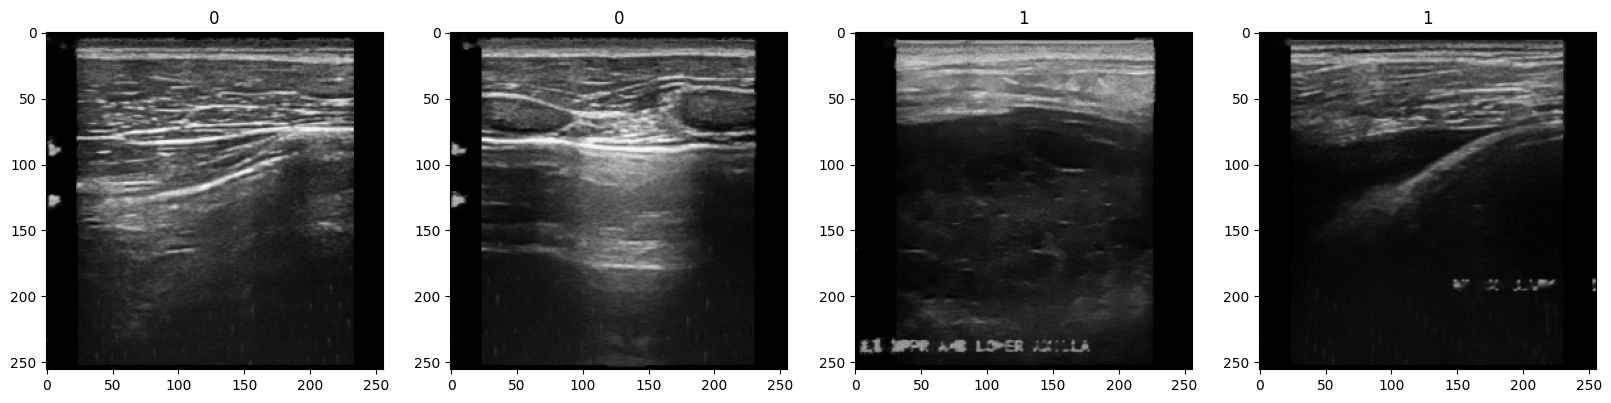

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 3. Scale Data

In [8]:
data = data.map(lambda x,y: (x/255, y))

In [9]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

## 4. Split Data

In [10]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.15)
test_size = int(len(data)*.15)

In [11]:
train_size

14

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 5. Build Deep Learning Model

In [13]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(8, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001
model.compile(optimizer =Adam(learning_rate= learning_rate), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 8)         4616      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 8)        0

## 6. Train

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
14/14 [==============================] - 23s 1s/step - loss: 0.0532 - accuracy: 0.9844 - val_loss: 0.0396 - val_accuracy: 0.9896
Epoch 2/10
14/14 [==============================] - 20s 1s/step - loss: 0.0196 - accuracy: 0.9978 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 3/10
14/14 [==============================] - 22s 2s/step - loss: 0.0104 - accuracy: 0.9933 - val_loss: 0.0129 - val_accuracy: 0.9896
Epoch 4/10
14/14 [==============================] - 20s 1s/step - loss: 0.0092 - accuracy: 0.9978 - val_loss: 0.0126 - val_accuracy: 0.9896
Epoch 5/10
14/14 [==============================] - 20s 1s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.3911e-04 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 21s 1s/step - loss: 7.6453e-04 - accuracy: 1.0000 - val_loss: 3.8656e-04 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 21s 1s/step - loss: 4.0454e-04 - accuracy: 1.0000 - val_loss: 5.1515e-04 - val_accuracy: 1.0000


## 7.Plot Performance

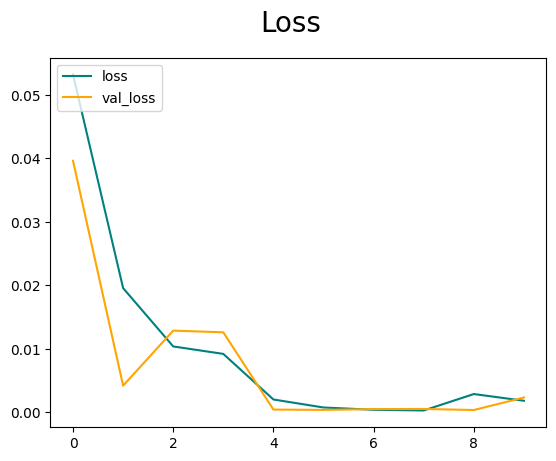

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

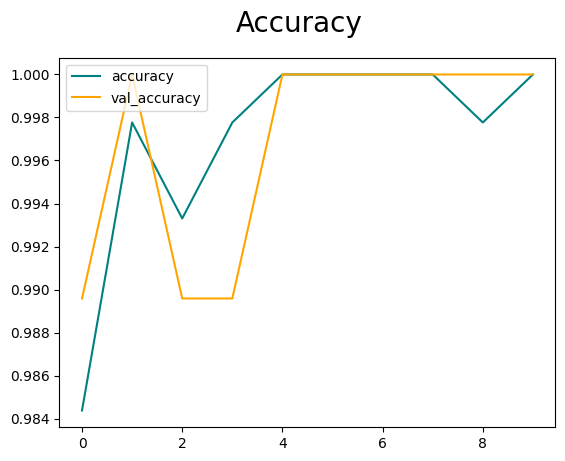

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 8.Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 200ms/step


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## 9.Test

In [43]:
import cv2

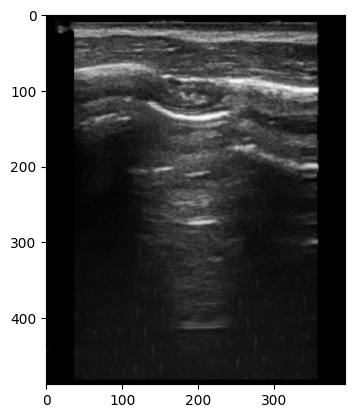

In [44]:
img = cv2.imread('dataset1/unknown_images/1.png')#dataset1/unknown_images/1.png
plt.imshow(img)
plt.show()

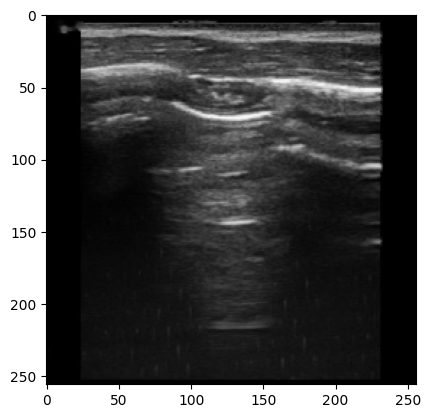

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [47]:
yhat

array([[0.4410701]], dtype=float32)

In [48]:
if yhat < 0.5: 
    print(f'Predicted class is Normal')
else:
    print(f'Predicted class is Sick')

Predicted class is Normal


## 10. Save the Model

In [49]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','dataset1model.h5'))
new_model = load_model('models/dataset1model.h5')
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 77ms/step


array([[0.4410701]], dtype=float32)